In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import auc, precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv', header=None)[0]
y_test = pd.read_csv('data/y_test.csv', header=None)[0]
scaler = StandardScaler()
X_train['normAmount'] = scaler.fit_transform(np.array(X_train['Amount']).reshape(-1, 1))
X_test['normAmount'] = scaler.transform(np.array(X_test['Amount']).reshape(-1, 1))
X_train.drop(['Time', 'Amount'], axis=1, inplace=True)
X_test.drop(['Time', 'Amount'], axis=1, inplace=True)

In [3]:
X_train.drop(['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24'], axis=1, inplace=True)
X_test.drop(['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24'], axis=1, inplace=True)

In [4]:
cnts = y_train.value_counts().tolist()
cnts[1] / sum(cnts)

0.0016853594430288317

In [5]:
cnts = y_test.value_counts().tolist()
cnts[1] / sum(cnts)

0.0018257785892349286

In [6]:
def print_metrics(y_train, y_train_pred, y_test, y_test_pred):
    print ("---Train---")
    print ("Precision: %.4f" % (precision_score(y_train, y_train_pred)))
    print ("Recall: %.4f" % (recall_score(y_train, y_train_pred)))
    print ("F1: %.4f" % (f1_score(y_train, y_train_pred)))
    print ("Confusion matrix:")
    print (confusion_matrix(y_train, y_train_pred))
    print ("\n---Test---")
    print ("Precision: %.4f" % (precision_score(y_test, y_test_pred)))
    print ("Recall: %.4f" % (recall_score(y_test, y_test_pred)))
    print ("F1: %.4f" % (f1_score(y_test, y_test_pred)))
    print ("Confusion matrix:")
    print (confusion_matrix(y_test, y_test_pred))

def aucpr(y_true, y_score):
    precision, recall, threshold = precision_recall_curve(y_true, y_score)
    indices = np.argsort(precision)
    precision = precision[indices]
    recall = recall[indices]
    plt.plot(recall, precision, '.')
    plt.show()
    return auc(precision, recall)

In [ ]:
train_prec = []
test_prec = []
train_rec = []
test_rec = []
train_f1 = []
test_f1 = []
neighs = [10, 20, 50, 100, 150, 200, 500]
for neigh in neighs:
    lof = LocalOutlierFactor(n_neighbors=neigh, algorithm='auto', metric='euclidean', contamination=0.0168, novelty=True, n_jobs=3)
    lof.fit(X_train)
    
    y_train_pred = lof.predict(X_train)
    y_test_pred = lof.predict(X_test)
    y_train_pred = np.array([pred==-1 for pred in y_train_pred], dtype=int)
    y_test_pred = np.array([pred==-1 for pred in y_test_pred], dtype=int)
    
    train_prec.append(precision_score(y_train, y_train_pred))
    test_prec.append(precision_score(y_test, y_test_pred))
    train_rec.append(recall_score(y_train, y_train_pred))
    test_rec.append(recall_score(y_test, y_test_pred))
    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

plt.plot(neighs, train_prec, label='train')
plt.plot(neighs, test_prec, label='test')
plt.title("Precision - num neighbors")
plt.legend()
plt.show()
    
plt.plot(neighs, train_rec, label='train')
plt.plot(neighs, test_rec, label='test')
plt.title("Recall - num neighbors")
plt.legend()
plt.show()    

plt.plot(neighs, train_f1, label='train')
plt.plot(neighs, test_f1, label='test')
plt.title("F1 - num neighbors")
plt.legend()
plt.show()

---Train---
Precision: 0.0338
Recall: 0.2440
F1: 0.0594
Confusion matrix:
[[196684   2344]
 [   254     82]]
---Test---
Precision: 0.0282
Recall: 0.2692
F1: 0.0510
Confusion matrix:
[[83838  1449]
 [  114    42]]


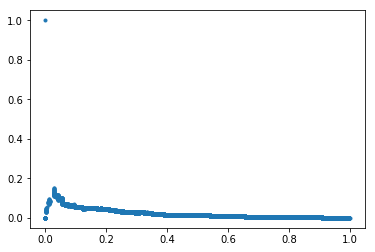

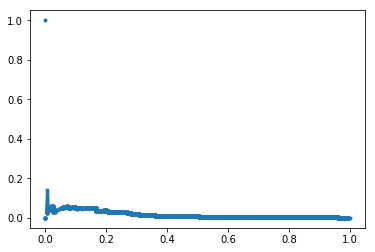

(0.03675477009070843, 0.019455190680810433)

In [8]:
lof = LocalOutlierFactor(n_neighbors=10, algorithm='auto', metric='euclidean', contamination=0.0168, novelty=True, n_jobs=3)
lof.fit(X_train)

y_train_pred = lof.predict(X_train)
y_test_pred = lof.predict(X_test)
y_train_pred = np.array([pred==-1 for pred in y_train_pred], dtype=int)
y_test_pred = np.array([pred==-1 for pred in y_test_pred], dtype=int)
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

y_train_score = -lof.score_samples(X_train)
y_test_score = -lof.score_samples(X_test)
aucpr(y_train, y_train_score), aucpr(y_test, y_test_score)